## III.2 Discrete Fourier Transform


In the last lecture we explored using the trapezium rule for approximating Fourier coefficients.
This is a linear map from function values to coefficients and thus can be reinterpreted as
a matrix-vector product, called the the Discrete Fourier Transform. It turns out the matrix
is unitary which leads to important properties including interpolation. Finally, we discuss how a clever
way of decomposing the DFT leads to a fast way of applying and inverting it, which is one of the
most influencial algorithms of the 20th century: the Fast Fourier Transform.


1. The Discrete Fourier Transform (DFT): We discuss the map from values to approximate Fourier coefficients, and back.
2. Interpolation: We show that the approximate Fourier expansion _exactly_ interpolates the values at the sample grid.
3. The Fast Fourier Transform (FFT): We discuss how the DFT can be applied in $O(n \log n)$ operations.

## 1. The Discrete Fourier transform

**Definition 1 (DFT)**
The _Discrete Fourier Transform (DFT)_ is defined as:
$$
\begin{align*}
Q_n &:= {1 \over \sqrt{n}} \begin{bmatrix} 1 & 1 & 1&  ⋯ & 1 \\
                                    1 & {\rm e}^{-{\rm i} θ_1} & {\rm e}^{-{\rm i} θ_2} & ⋯ & {\rm e}^{-{\rm i} θ_{n-1}} \\
                                    1 & {\rm e}^{-{\rm i} 2 θ_1} & {\rm e}^{-{\rm i} 2 θ_2} & ⋯ & {\rm e}^{-{\rm i} 2θ_{n-1}} \\
                                    ⋮ & ⋮ & ⋮ & ⋱ & ⋮ \\
                                    1 & {\rm e}^{-{\rm i} (n-1) θ_1} & {\rm e}^{-{\rm i} (n-1) θ_2} & ⋯ & {\rm e}^{-{\rm i} (n-1) θ_{n-1}}
\end{bmatrix} \\
&= {1 \over \sqrt{n}} \begin{bmatrix} 1 & 1 & 1&  ⋯ & 1 \\
                                    1 & ω^{-1} & ω^{-2} & ⋯ & ω^{-(n-1)}\\
                                    1 & ω^{-2} & ω^{-4} & ⋯ & ω^{-2(n-1)}\\
                                    ⋮ & ⋮ & ⋮ & ⋱ & ⋮ \\
                                    1 & ω^{-(n-1)} & ω^{-2(n-1)} & ⋯ & ω^{-(n-1)^2}
\end{bmatrix}
\end{align*}
$$
for the $n$-th root of unity $ω = {\rm e}^{2π{\rm i}/n}$. Note that
$$
\begin{align*}
Q_n^⋆ &= {1 \over \sqrt{n}} \begin{bmatrix}
1 & 1 & 1&  ⋯ & 1 \\
1 & {\rm e}^{{\rm i} θ_1} & {\rm e}^{{\rm i} 2 θ_1} & ⋯ & {\rm e}^{{\rm i} (n-1) θ_1} \\
1 &  {\rm e}^{{\rm i} θ_2}  & {\rm e}^{{\rm i} 2 θ_2} & ⋯ & {\rm e}^{{\rm i} (n-1)θ_2} \\
⋮ & ⋮ & ⋮ & ⋱ & ⋮ \\
1 & {\rm e}^{{\rm i} θ_{n-1}} & {\rm e}^{{\rm i} 2 θ_{n-1}} & ⋯ & {\rm e}^{{\rm i} (n-1) θ_{n-1}}
\end{bmatrix} \\
&= {1 \over \sqrt{n}} \begin{bmatrix}
1 & 1 & 1&  ⋯ & 1 \\
1 & ω^{1} & ω^{2} & ⋯ & ω^{(n-1)}\\
1 & ω^{2} & ω^{4} & ⋯ & ω^{2(n-1)}\\
⋮ & ⋮ & ⋮ & ⋱ & ⋮ \\
1 & ω^{(n-1)} & ω^{2(n-1)} & ⋯ & ω^{(n-1)^2}
\end{bmatrix}
\end{align*}
$$

Note that
$$
\underbrace{\begin{bmatrix} f̂_0^n \\ ⋮ \\ f̂_{n-1}^n \end{bmatrix}}_{𝐟̂ⁿ} = 
{1 \over \sqrt{n}} Q_n \underbrace{\begin{bmatrix} f(θ_0) \\ ⋮ \\ f(θ_{n-1}) \end{bmatrix}}_{𝐟ⁿ}
$$

The choice of normalisation constant is motivated by the following:

**Proposition 1 (DFT is Unitary)** $Q_n ∈ U(n)$, that is, $Q_n^⋆ Q_n = Q_n Q_n^⋆ = I$.

**Proof**
$$
Q_n Q_n^⋆  = \begin{bmatrix} Σ_n[1] & Σ_n[{\rm e}^{{\rm i} θ}] & ⋯ & Σ_n[{\rm e}^{{\rm i} (n-1) θ}] \\
                            Σ_n[{\rm e}^{-{\rm i} θ}] & Σ_n[1] & ⋯ & Σ_n[{\rm e}^{{\rm i} (n-2) θ}] \\
                            ⋮ & ⋮ & ⋱ & ⋮ \\
                            Σ_n[{\rm e}^{-{\rm i}(n-1) θ}] & Σ_n[{\rm e}^{-{\rm i}(n-2) θ}] & ⋯ & Σ_n[1]
                            \end{bmatrix} = I
$$
∎

In other words, $Q_n$ is easily inverted and we also have a map from discrete Fourier coefficients back to values:
$$
\sqrt{n} Q_n^⋆ 𝐟̂ⁿ = 𝐟ⁿ
$$

## 2. Interpolation

We investigated briefly interpolation and least squares using polynomials at evenly spaced points, observing that
there were issues with stability. We now show that the DFT actually gives coefficients that interpolate using Fourier
expansions. As the DFT is a unitary matrix its (2-norm) condition number is 1, hence this is a stable process. Thus we arrive
at the main result:

**Corollary 1 (Interpolation)**
$$
f_n(θ) := ∑_{k=0}^{n-1} f̂_k^n {\rm e}^{{\rm i} k θ}
$$
interpolates $f$ at $θ_j$:
$$
f_n(θ_j) = f(θ_j)
$$

**Proof**
We have
$$
f_n(θ_j) = ∑_{k=0}^{n-1} f̂_k^n {\rm e}^{{\rm i} k θ_j} = \sqrt n 𝐞_j^⊤ Q_n^⋆ 𝐟̂ⁿ = 𝐞_j^⊤ Q_n^⋆ Q_n 𝐟ⁿ = f(θ_j).
$$

∎


We will leave extending this result to the general non-Taylor case to the problem sheet. Note that regardless of choice of coefficients
we interpolate provided we have $n$ consecutive coefficients, though some interpolations are better than others:

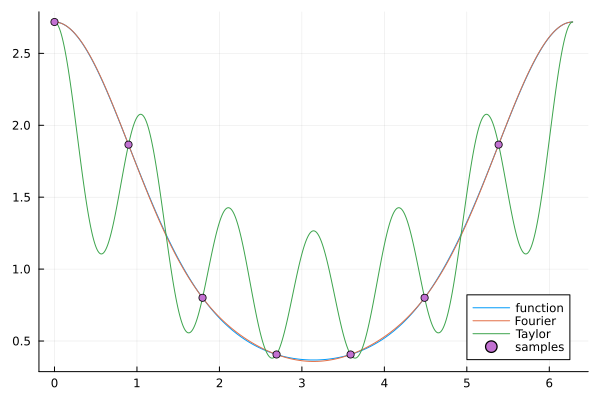

In [1]:
using Plots, LinearAlgebra


# evaluates f_n at a point
function finitefourier(𝐟̂ₙ, θ)
    m = n ÷ 2 # use coefficients between -m:m
    ret = 0.0 + 0.0im # coefficients are complex so we need complex arithmetic
    for k = 0:m
        ret += 𝐟̂ₙ[k+1] * exp(im*k*θ)
    end
    for k = -m:-1
        ret += 𝐟̂ₙ[end+k+1] * exp(im*k*θ)
    end
    ret
end

function finitetaylor(𝐟̂ₙ, θ)
    ret = 0.0 + 0.0im # coefficients are complex so we need complex arithmetic
    for k = 0:n-1
        ret += 𝐟̂ₙ[k+1] * exp(im*k*θ)
    end
    ret
end


f = θ -> exp(cos(θ))
n = 7
θ = range(0,2π; length=n+1)[1:end-1] # θ_0, …,θ_{n-1}, dropping θ_n == 2π
Qₙ = 1/sqrt(n) * [exp(-im*(k-1)*θ[j]) for k = 1:n, j=1:n]
𝐟̂ₙ = 1/sqrt(n) * Qₙ * f.(θ)


fₙ = θ -> finitefourier(𝐟̂ₙ, θ)
tₙ = θ -> finitetaylor(𝐟̂ₙ, θ)

g = range(0, 2π; length=1000) # plotting grid
plot(g, f.(g); label="function", legend=:bottomright)
plot!(g, real.(fₙ.(g)); label="Fourier")
plot!(g, real.(tₙ.(g)); label="Taylor")
scatter!(θ, f.(θ); label="samples")

We now demonstrate the relationship of Taylor and Fourier coefficients
and their discrete approximations for some examples:

**Example 1** Consider the function
$$
f(θ) = {2 \over 2 - {\rm e}^{{\rm i} θ}}
$$
Under the change of variables $z = {\rm e}^{{\rm i} θ}$ we know for
$z$ on the unit circle this becomes (using the geometric series with $z/2$)
$$
{2 \over 2-z} = ∑_{k=0}^∞ {z^k \over 2^k}
$$
i.e., $f̂_k = 1/2^k$ which is absolutely summable:
$$
∑_{k=0}^∞ |f̂_k| = f(0) = 2.
$$
If we use an $n$ point discretisation we get (using the geoemtric series with $2^{-n}$)
$$
f̂_k^n = f̂_k + f̂_{k+n} + f̂_{k+n} + ⋯ = ∑_{p=0}^∞ {1 \over 2^{k+pn}} = {2^{n-k} \over 2^n - 1}
$$
We can verify this numerically:

In [2]:
f = θ -> 2/(2 - exp(im*θ))
n = 7
θ = range(0,2π; length=n+1)[1:end-1] # θ_0, …,θ_{n-1}, dropping θ_n == 2π
Qₙ = 1/sqrt(n) * [exp(-im*(k-1)*θ[j]) for k = 1:n, j=1:n]

Qₙ/sqrt(n)*f.(θ) ≈ 2 .^ (n .- (0:n-1)) / (2^n-1)

true

**Example 2** Define the following infinite sum (which has no name apparently,
according to Mathematica):
$$
S_n(k) := ∑_{p=0}^∞ {1 \over (k+pn)!}
$$
We can use the DFT to compute $S_n(0), …, S_n(n-1)$.
Consider
$$
f(θ) = \exp({\rm e}^{{\rm i} θ}) = ∑_{k=0}^∞ {{\rm e}^{{\rm i} k θ} \over k!}
$$
where we know the Fourier coefficients from the Taylor series of ${\rm e}^z$. 
The discrete Fourier coefficients satisfy for $0 ≤ k ≤ n-1$:
$$
f̂_k^n = f̂_k + f̂_{k+n} + f̂_{k+2n} + ⋯ = S_n(k)
$$
Thus we have
$$
\begin{bmatrix}
S_n(0) \\ 
⋮ \\
S_n(n-1)
\end{bmatrix} = {1 \over \sqrt{n}} Q_n \begin{bmatrix} 1 \\
                                \exp({\rm e}^{2{\rm i} π/n}) \\
                                ⋮ \\
                                \exp({\rm e}^{2{\rm i} (n-1) π/n}) \end{bmatrix}
$$




## 3. Fast Fourier Transform (non-examinable)

Applying $Qₙ$ or its adjoint $Q_n^⋆$ to a vector naively takes $O(n^2)$ operations.
Both can be reduced to $O(n \log n)$ using the celebrated _Fast Fourier Transform_ (FFT),
which is one of the [Top 10 Algorithms of the 20th Century](https://pi.math.cornell.edu/~web6140/)
(You won't believe number 7!).

The key observation is that hidden in $Q_{2n}$ are 2 copies of
$Q_n$. We will work with multiple $n$ we denote the $n$-th root as $ω_n = \exp(2π/n)$.
Note that we can relate a vector of powers of $ω_{2n}$ to two copies of vectors of powers of $ω_n$:
$$
\underbrace{\begin{bmatrix} 1 \\ ω_{2n} \\ ⋮ \\ ω_{2n}^{2n-1} \end{bmatrix}}_{\vec{ω}_{2n}} =
P_σ^⊤ \begin{bmatrix} I_n \\ ω_{2n} I_n \end{bmatrix} \underbrace{\begin{bmatrix} 1 \\ ω_n \\ ⋮ \\ ω_n^{n-1} \end{bmatrix}}_{\vec{ω}_n}
$$
where $σ$ has the Cauchy notation
$$
\begin{pmatrix}
1 & 2 & 3 & ⋯ & n & n+1 & ⋯ & 2n \\
1 & 3 & 5 & ⋯ & 2n-1 & 2 & ⋯ & 2n
\end{pmatrix}
$$
That is, $P_σ$ is the following matrix which takes the even entries
and places them in the first $n$ entries and the odd entries in the
last $n$ entries:

In [3]:
n = 4
σ = [1:2:2n-1; 2:2:2n]
P_σ = I(2n)[σ,:]

8×8 Matrix{Bool}:
 1  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0
 0  0  0  0  1  0  0  0
 0  0  0  0  0  0  1  0
 0  1  0  0  0  0  0  0
 0  0  0  1  0  0  0  0
 0  0  0  0  0  1  0  0
 0  0  0  0  0  0  0  1

and so $P_σ^⊤$ reverses the process.
Thus we have
$$
\begin{align*}
Q_{2n}^⋆ &= {1 \over \sqrt{2n}} \begin{bmatrix} 𝟏_{2n} | \vec{ω}_{2n} | \vec{ω}_{2n}^2 | ⋯ | \vec{ω}_{2n}^{2n-1} \end{bmatrix}
= {1 \over \sqrt{2n}} P_σ^⊤ \begin{bmatrix} 𝟏_{n} &   \vec{ω}_n        & \vec{ω}_n^2          & ⋯ & \vec{ω}_n^{n-1}          & \vec{ω}_n^n  & ⋯ & \vec{ω}_n^{2n-1}  \\
                        𝟏_{n} & ω_{2n} \vec{ω}_n & ω_{2n}^2 \vec{ω}_n^2 & ⋯ & ω_{2n}^{n-1} \vec{ω}_n^{n-1} & ω_{2n}^n \vec{ω}_n^n  & ⋯ & ω_{2n}^{2n-1} \vec{ω}_n^{2n-1}
\end{bmatrix} \\
&= {1 \over \sqrt{2}} P_σ^⊤ \begin{bmatrix} Q_n^⋆ & Q_n^⋆ \\
                                     Q_n^⋆ D_n & -Q_n^⋆ D_n
                                     \end{bmatrix} =
                                     {1 \over \sqrt{2}}P_σ^⊤ \begin{bmatrix} Q_n^⋆ \\ &Q_n^⋆ \end{bmatrix} \begin{bmatrix} I_n & I_n \\ D_n & -D_n \end{bmatrix}
\end{align*}
$$
In other words, we reduced the DFT to two DFTs applied to vectors of half the dimension.

We can see this formula in code:

In [4]:
function fftmatrix(n)
    θ = range(0,2π; length=n+1)[1:end-1] # θ_0, …,θ_{n-1}, dropping θ_n == 2π
    [exp(-im*(k-1)*θ[j]) for k = 1:n, j=1:n]/sqrt(n)
end

Q₂ₙ = fftmatrix(2n)
Qₙ = fftmatrix(n)
Dₙ = Diagonal([exp(im*k*π/n) for k=0:n-1])
(P_σ'*[Qₙ' Qₙ'; Qₙ'*Dₙ -Qₙ'*Dₙ])[1:n,1:n] ≈ sqrt(2)Q₂ₙ'[1:n,1:n]

true

Now assume $n = 2^q$ so that $\log_2 n = q$. To see that we get $O(n \log n) = O(n q)$ operations we need to count the operations.
Assume that applying $F_n$ takes $≤3n q$ additions and multiplications. The first $n$ rows takes $n$ additions. The last $n$ has $n$ multiplications and $n$ additions.
Thus we have $6nq + 3n ≤ 6n(q+1) = 3 (2n) \log_2(2n)$ additions/multiplications, showing by induction that we have $O(n \log n)$ operations.



**Remark** The FFTW.jl package wraps the FFTW (Fastest Fourier Transform in the West) library,
which is a highly optimised implementation
of the FFT that also works well even when $n$ is not a power of 2.
(As an aside, the creator of FFTW [Steven Johnson](https://math.mit.edu/~stevenj/) is now a
Julia contributor and user.)
 Here we approximate $\exp(\cos(θ-0.1))$ using
31 nodes:

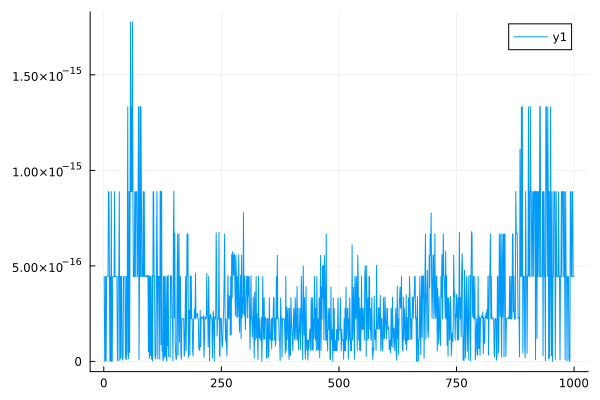

In [6]:
using FFTW
f = θ -> exp(cos(θ-0.1))
n = 31
m = n÷2
# evenly spaced points from 0:2π, dropping last node
θ = range(0, 2π; length=n+1)[1:end-1]

# fft returns discrete Fourier coefficients n*[f̂ⁿ_0, …, f̂ⁿ_(n-1)]
fc = fft(f.(θ))/n

# We reorder using [f̂ⁿ_(-m), …, f̂ⁿ_(-1)] == [f̂ⁿ_(n-m), …, f̂ⁿ_(n-1)]
#  == [f̂ⁿ_(m+1), …, f̂ⁿ_(n-1)]
f̂ = [fc[m+2:end]; fc[1:m+1]]

# equivalent to f̂ⁿ_(-m)*exp(-im*m*θ) + … + f̂ⁿ_(m)*exp(im*m*θ)
fₙ = θ -> transpose([exp(im*k*θ) for k=-m:m]) * f̂

# plotting grid
g = range(0, 2π; length=1000)
plot(abs.(fₙ.(g) - f.(g)))

Thus we have successfully approximate the function to roughly machine precision.
The magic of the FFT is because it's $O(n \log n)$ we can scale it to very high orders.
Here we plot the Fourier coefficients for a function that requires around 100k
coefficients to resolve:

In [7]:
f = θ -> exp(sin(θ))/(1+1e6cos(θ)^2)
n = 100_001
m = n÷2
# evenly spaced points from 0:2π, dropping last node
θ = range(0, 2π; length=n+1)[1:end-1]

# fft returns discrete Fourier coefficients n*[f̂ⁿ_0, …, f̂ⁿ_(n-1)]
fc = fft(f.(θ))/n


# We reorder using [f̂ⁿ_(-m), …, f̂ⁿ_(-1)] == [f̂ⁿ_(n-m), …, f̂ⁿ_(n-1)]
#  == [f̂ⁿ_(m+1), …, f̂ⁿ_(n-1)]
f̂ = [fc[m+2:end]; fc[1:m+1]]

plot(abs.(fc); yscale=:log10, legend=:bottomright, label="default")
plot!(abs.(f̂); yscale=:log10, label="reordered")